In [3]:
import cv2
import pandas as pd
from google.colab import files
from IPython.display import display, Image
import numpy as np
from PIL import Image as PILImage
from google.colab import drive

# Connect Google Drive to Google Colab for file access and storage
from google.colab import drive
drive.mount('/content/drive')

# Path to the CSV file in Google Drive
csv_path = '/content/drive/My Drive/colors.csv'
# Path to the image file in Google Drive
img_path = '/content/drive/My Drive/colorpic.jpeg'

# Define the names for the columns to use in the DataFrame
index = ["color", "color_name", "hex", "R", "G", "B"]
# Load the CSV file into a DataFrame
csv = pd.read_csv(csv_path, names=index, header=None)
img = cv2.imread(img_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/colors.csv'

In [ ]:
# Verify if the image is loaded properly
from PIL import Image

try:
    # Attempt to open the image file

    print("Image loaded successfully.")
except IOError:
    # This exception handles cases where the image file couldn't be opened
    print("Error: Could not load image. Check the path.")


Image loaded successfully.


Selected Color: Wild Blue Yonder - RGB: (161, 173, 185)


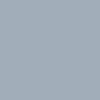

In [ ]:
# Function to calculate minimum distance from all colors and get the most matching color
def get_color_name(R, G, B):
    minimum = 10000
    colorname = ""
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            colorname = csv.loc[i, "color_name"]
    return colorname

# Function to show the image with the selected color area
def show_selected_color(x, y):
    b, g, r = img[y, x]
    selected_color = np.zeros((100, 100, 3), np.uint8)
    selected_color[:] = [b, g, r]
    text = get_color_name(r, g, b)
    print(f"Selected Color: {text} - RGB: ({r}, {g}, {b})")
    # Convert color space from BGR to RGB for displaying
    selected_color = cv2.cvtColor(selected_color, cv2.COLOR_BGR2RGB)
    pil_img = PILImage.fromarray(selected_color)
    display(pil_img)

# Example manual input
x = 110 # Replace with your x coordinate
y = 50 # Replace with your y coordinate
show_selected_color(x, y)


In [ ]:
import cv2
import pandas as pd
import numpy as np
import json
import re
from PIL import Image as PILImage
from IPython.display import display
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in Google Drive
csv_path = '/content/drive/My Drive/colors.csv'
# Path to the image file in Google Drive
img_path = '/content/drive/My Drive/colorpic.jpeg'

# Load the CSV file into a DataFrame
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv(csv_path, names=index, header=None)


# Read the image
img = cv2.imread(img_path)
# Read the Json file





# # Path to your JSON file
# json_path = '/content/drive/My Drive/Colab Notebooks/colors2.json'

# # Load the JSON file
# with open(json_path) as json_file:
# data = json.load(json_file)

# # Use your JSON data
# print(data)

# Helper functions to parse color data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(color_data_string)


  Color Name 1  #FFFFFF
  Color Name 2  #000000



In [ ]:
def split_line(line):
    fields = line.split('\t')
    if not fields:
        raise ValueError(f"Empty line encountered: {line}")
    return make_identifier(fields[0]), fields[0], simplify_hex_color(fields[1]), hex_to_rgb_triplet(fields[1])

In [ ]:
def split_line(line):
    fields = line.split('\t')

    # Check if fields has at least 2 elements before accessing them
    if len(fields) >= 2:
        return make_identifier(fields[0]), fields[0], simplify_hex_color(fields[1]), hex_to_rgb_triplet(fields[1])
    else:
        # Handle the case where fields doesn't have enough elements
        print(f"Error: Insufficient fields in line - {line}")
        return None  # You can choose to return a default value or handle it as needed


In [5]:
import cv2
import pandas as pd
import numpy as np
import json
import re
from PIL import Image as PILImage
# from google.colab import drive  # This line should be uncommented only in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Path to the CSV file in Google Drive
csv_path = '/content/drive/My Drive/Colab Notebooks/colors.csv'
# Path to the image file in Google Drive
img_path = '/content/drive/My Drive/Colab Notebooks/colorpic.jpeg'
# Path to the JSON file in Google Drive
json_path = '/content/drive/My Drive/Colab Notebooks/newcolors.json'

# Load the CSV file into a DataFrame
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv(csv_path, names=index, header=None)

# Read the image
img = cv2.imread(img_path)

# Load the JSON file
data = {}
with open(json_path) as json_file:
    data = json.load(json_file)

# Helper functions to parse color data
# ... (Keep your existing helper functions here)

# Function to calculate minimum distance from all colors and get the most matching color
def get_color_name(R, G, B):
    minimum = 10000
    colorname = ""
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            colorname = csv.loc[i, "color_name"]
    return colorname

# Function to show the image with the selected color area
def show_selected_color(x, y):
    b, g, r = img[y, x]
    selected_color = np.zeros((100, 100, 3), np.uint8)
    selected_color[:] = [b, g, r]
    text = get_color_name(r, g, b)
    print(f"Selected Color: {text} - RGB: ({r}, {g}, {b})")
    # Convert color space from BGR to RGB for displaying
    selected_color = cv2.cvtColor(selected_color, cv2.COLOR_BGR2RGB)
    pil_img = PILImage.fromarray(selected_color)
    pil_img.show()  # Changed from display() to show() for non-Colab environments

# Example usage
x = 50  # Replace with your x coordinate
y = 50  # Replace with your y coordinate
show_selected_color(x, y)

# Example of parsing color data from a string
import json

def parse_colors_from_string(color_data_str):
    """
    Parses a string containing color names and their corresponding hex values,
    separated by tabs, into a dictionary.
    """
    color_dict = {}
    # Split the string into lines
    lines = color_data_str.strip().split('\n')
    for line in lines:
        # Split each line by tab to separate the color name from its hex value
        parts = line.split('\t')
        if len(parts) == 2:
            color_name, hex_value = parts
            color_dict[color_name.strip()] = hex_value.strip()
    return color_dict

def to_json(data):
    """
    Converts a dictionary to a JSON string.
    """
    return json.dumps(data, indent=4)

# Now, use the defined functions with your color_data_string
color_data_string = """
Color Name 1\t#FFFFFF
Color Name 2\t#000000
"""
color_dict = parse_colors_from_string(color_data_string)
json_string = to_json(color_dict)
print(json_string)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Selected Color: Cadet Grey - RGB: (156, 168, 180)
{
    "Color Name 1": "#FFFFFF",
    "Color Name 2": "#000000"
}
